In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from IPython.display import clear_output

In [2]:
A = np.array([[- np.sqrt(2) / 2,              0,   np.sqrt(2) / 2],
              [- np.sqrt(6) / 6, np.sqrt(6) / 3, - np.sqrt(6) / 6]])

points = A @ np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

In [3]:
def plot_predictions(championship, year, model, games, pars, title, filename=None):
    with open(f'results/probs/game_probs_{championship}_{year}_{model}_{games}_games_{pars}_pars.json') as f:
        data = json.load(f)

    result_probs = list()
    for home in data:
        for away in data[home]:
            probs = np.array(data[home][away])
            home_prob = np.sum(np.tril(probs, -1))
            draw_prob = np.sum(np.diag(probs))
            away_prob = np.sum(np.triu(probs, 1))
            result_probs += [[home_prob, draw_prob, away_prob]]

    result_probs = A @ np.array(result_probs).T

    fig = go.Figure(data=go.Scatter(x=points[0, :],
                                    y=points[1, :],
                                    mode='markers',
                                    showlegend=False,
                                    marker=dict(color='black')))

    fig.update_layout(plot_bgcolor='white')
    fig.update_xaxes(showline=False, showgrid=False, zeroline=False,
                    showticklabels=False, title='')

    fig.update_yaxes(showline=False, showgrid=False, zeroline=False,
                    showticklabels=False, title='')

    fig.add_trace(go.Scatter(x=points[0, :].tolist() + [points[0, 0]],
                            y=points[1, :].tolist() + [points[1, 0]],
                            mode='lines', line=dict(color='black'), showlegend=False))

    fig.add_trace(go.Scatter(x=result_probs[0, :], y=result_probs[1, :],
                            mode='markers', showlegend=False))

    fig.add_annotation(
        text='Home win <<<<< >>>>> Away win',
        xref='paper', yref='paper',
        x=0.5, y=-0.1,
        showarrow=False,
        font=dict(size=14),
    )

    fig.add_annotation(
        text='>>>>> Draw',
        xref='paper', yref='paper',
        x=0, y=0.5,
        showarrow=False,
        font=dict(size=14),
        textangle=-90,
    )

    fig.update_layout(title=title)
    if filename is not None: fig.write_image(f'{filename}.png')
    fig.show('png')

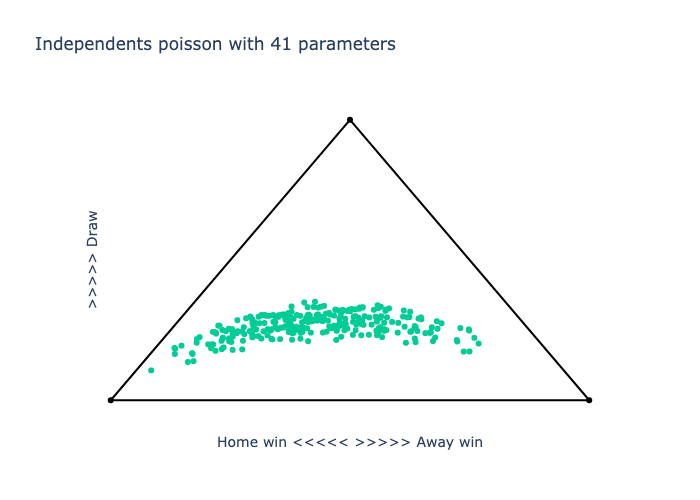

In [4]:
championship = 'Serie_A'
year = 2022
model = 'independents_poisson'
games = 100
pars = 41
# title = f'{model.capitalize()} with {pars} parameters and {games} games to train from {year}\'s {championship}'.replace('_', ' ')
title = f'{model.capitalize()} with {pars} parameters'.replace('_', ' ')
plot_predictions(championship, year, model, games, pars, title)

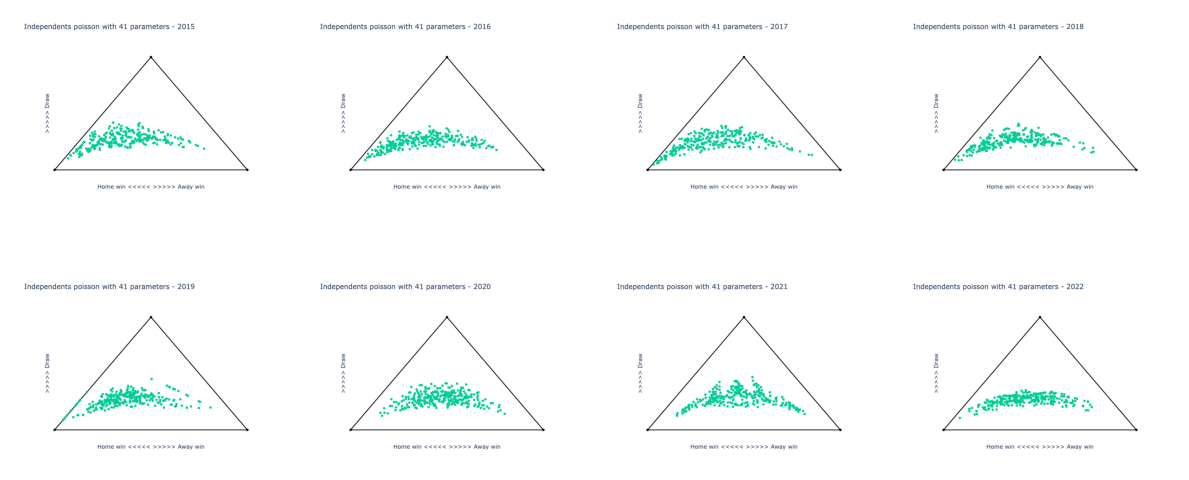

In [5]:
championship = 'Serie_A'
model = 'independents_poisson'
games = 100
pars = 41
for year in range(2015, 2023):
    title = f'{model.capitalize()} with {pars} parameters - {year}'.replace('_', ' ')
    plot_predictions(championship, year, model, games, pars, title, filename=year)

clear_output()
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
for i in range(8):
    row = i // 4
    col = i % 4

    img = plt.imread(f'{2015 + i}.png')
    axs[row, col].imshow(img)
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

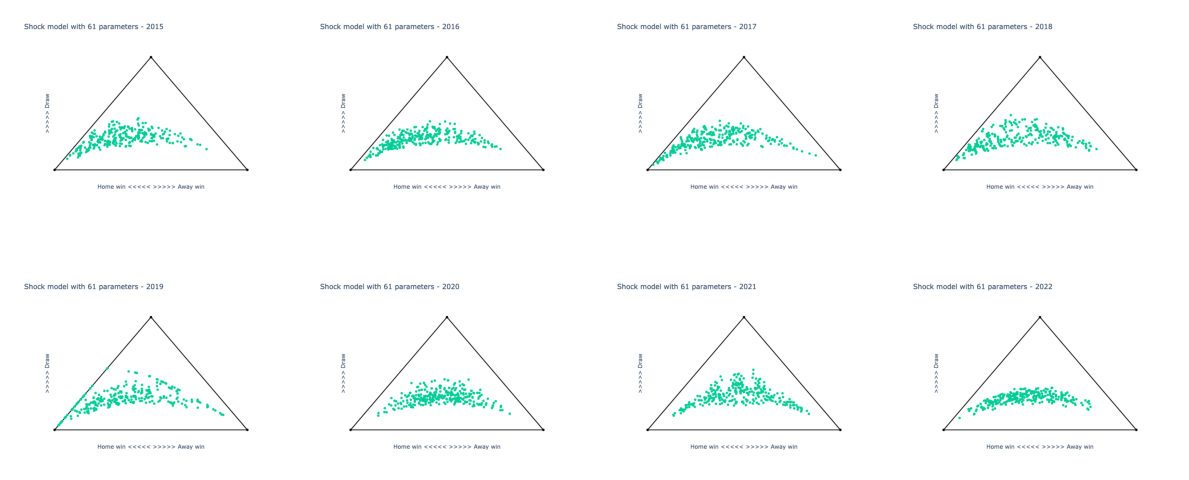

In [6]:
championship = 'Serie_A'
model = 'shock_model'
games = 100
pars = 61
for year in range(2015, 2023):
    title = f'{model.capitalize()} with {pars} parameters - {year}'.replace('_', ' ')
    plot_predictions(championship, year, model, games, pars, title, filename=year)

clear_output()
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
for i in range(8):
    row = i // 4
    col = i % 4

    img = plt.imread(f'{2015 + i}.png')
    axs[row, col].imshow(img)
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()